# Washington Weather analysis (Moses Lake, Kennewick, Pullman)

## Introduction
This is a report on the historical analysis of weather patterns in an area that approximately overlaps eastern state of Washington.

The data we will use here comes from [NOAA](https://www.ncdc.noaa.gov/)and is downloaded from This [FTP site](ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/).

## Data description
The data have the form below
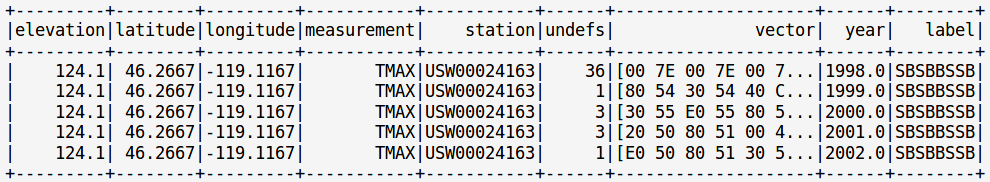

One row of data contains one measurement in one station during a specific year. There are six different measurements in the following:
* **TMIN, TMAX:** the daily minimum and maximum temperature.
* **TOBS:** The average temperature for each day.
* **PRCP:** Daily Percipitation (in mm)
* **SNOW:** Daily snowfall (in mm)
* **SNWD:** The depth of accumulated snow.


## Climate background from outside sources
The region I analyze (eastern Washington state) includes three major city, Moses Lake, Kennewick and Pullman. The map of my region is shown below.
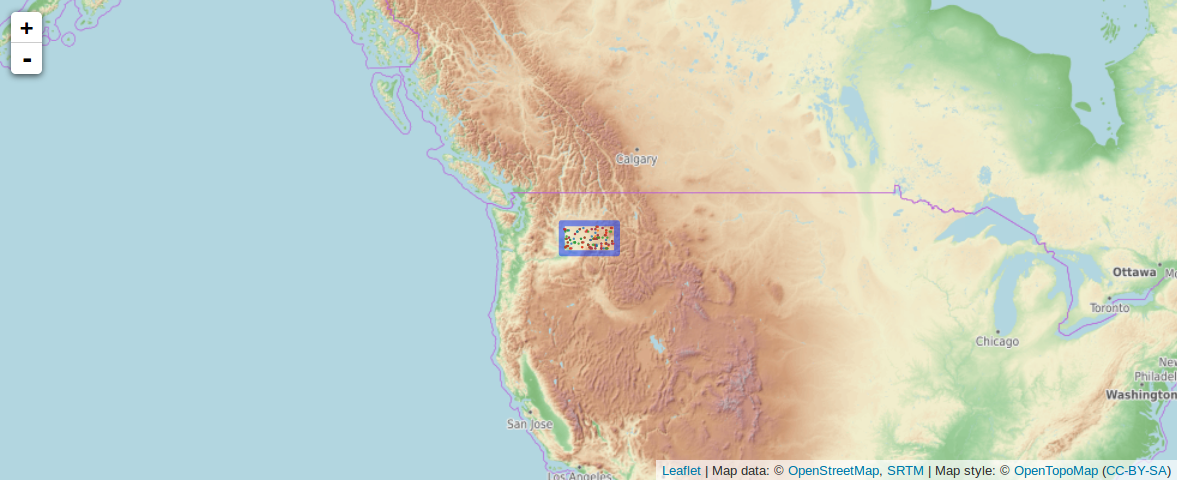
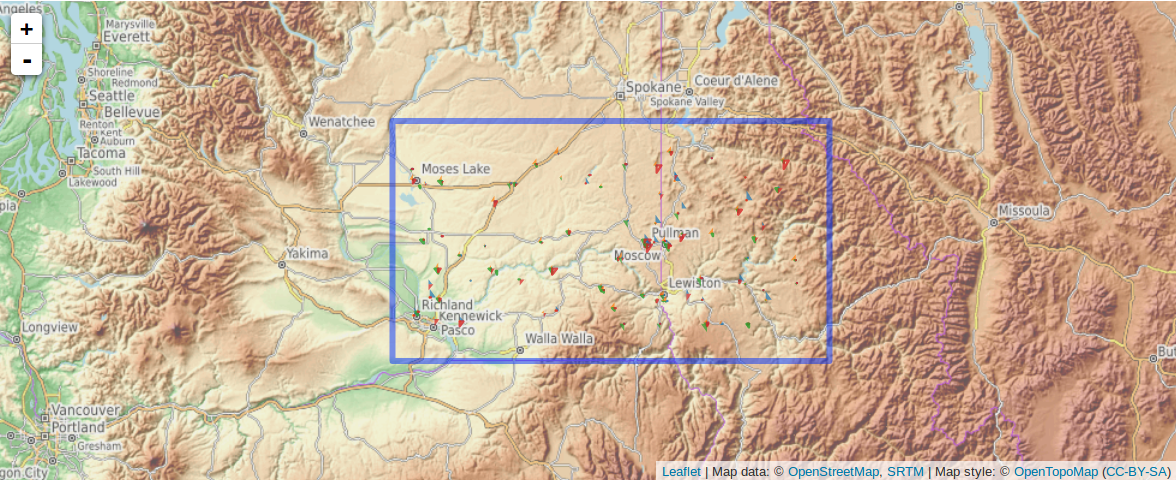

To perform analysis, I first investigate the climate and geography in that place. The graph below shows the daily minimum and maximum temperatures for each month, as well as the total precipitation for each month. (Source: US Climate Data)
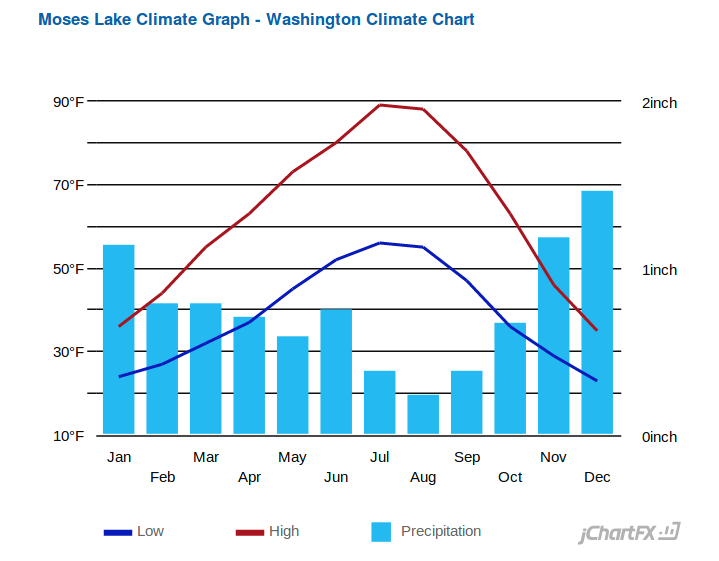


The high mountains of the Cascade Range run north-south and divide Washington state into "West side" and "East side". These mountains block the humidity from the ocean and bring the eastern area a much drier semi-arid climate.
Some places here are even dessert. Farther east, however, the climate becomes less arid due to the humidity from the north. The annual rainfall increases in Pullman, near the Washington-Idaho border.

Also, we can find that the rain varies between seasons. Major factors determining this include the large semi-permanent high pressure and low pressure systems of the north Pacific Ocean.

In the spring and summer, a high pressure anticyclone system dominates the north Pacific Ocean, causing air to spiral out in a clockwise fashion. For Washington this means prevailing winds from the northwest bring relatively cool air and a predictably dry season.

In the autumn and winter, a low-pressure cyclone system takes over in the north Pacific Ocean, with air spiraling inward in a counter-clockwise fashion. This causes Washington's prevailing winds, the Chinooks, to come from the southwest, bringing relatively warm and moist air masses and a predictably wet season.

## Sanity checks
To make sure that our data is correct, we perform some statistics on them to see if they match the statistic from outside resource.
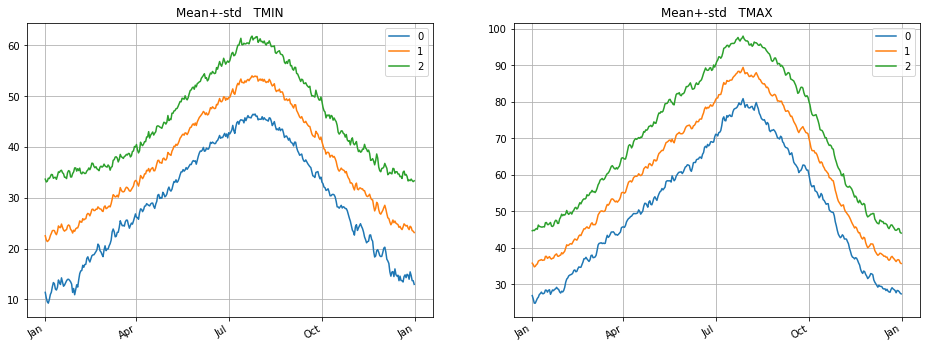
We can see that our data agree with the outside source (I already translate the temperature from Centigrade to Fahrenheit).

To compare the precipitation we need to translate millimeter/day to inches/month. (1 inch = 2.54 cm)
We see that the curve of the rainfall throughout the year agrees with the outside source. The rain in summer is significantly less than the rain in winter.
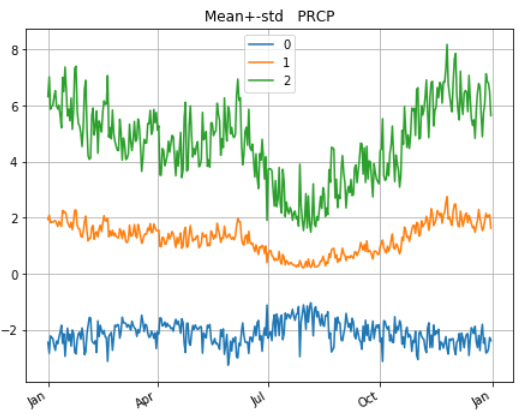



## PCA analysis
For each of the six measurement, we compute the percentate of the variance explained as a function of the number of eigen-vectors used.

### Percentage of variance explained.
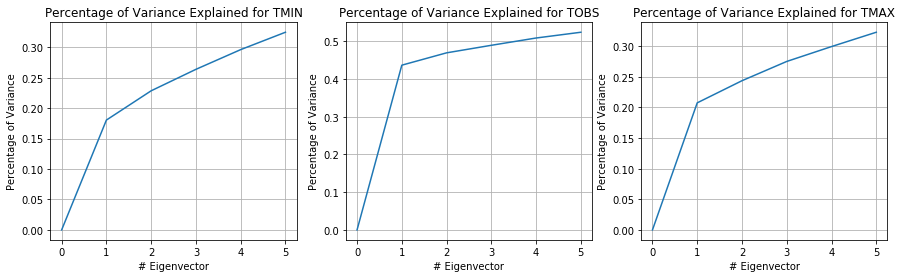
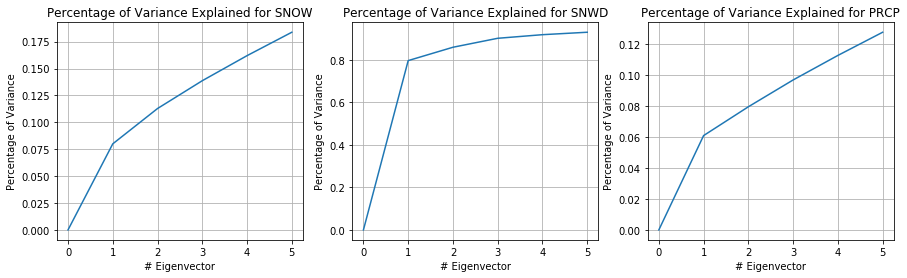
From the above figures, we can see that the top 5 eigen vectors explan 93% of varience for SNWD and 52% of varience for TOBS. These two measurements are best explaned by the top 5 eigen vectors. It means that SNWD and TOBS contain the least noise and the top 5 eigenvectors could capture most of their variation. Hence, I decide to further study these two measurements.

### Analysis of SNWD
First, I graph the mean and the top 3 eigen-vectors of SNWD
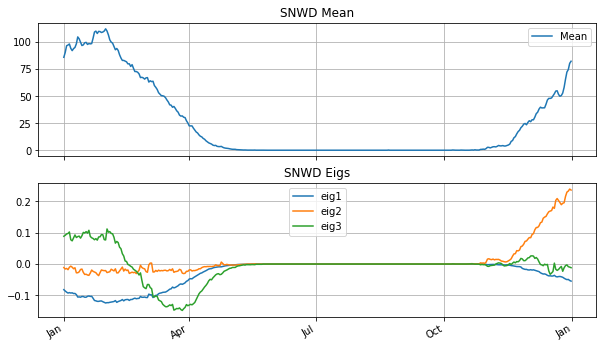

I observe that the snow season is from mid-november to the end of May, where the middle of February marks the peak of the snow-depth. We can clearly see that different eigen vectors capture different snow patterns throughout the year. So, I am going to interpret these three eigen vectors.

**eig1:** The first eigen vector typically represents the mean of the distribution. In my graph, it is different with the mean by a negative sign. It is common that PCA analysis generates eigen vectors with different signs.

**eig2:** It captures the snow accumulated at the end of the year (Nov.-Dec.).

**eig3:** It captures that more snow in late winter (Jan.-Feb.) and less snow in spring (Mar.-Apr.).


#### Coeff1
Coeff1: most positive
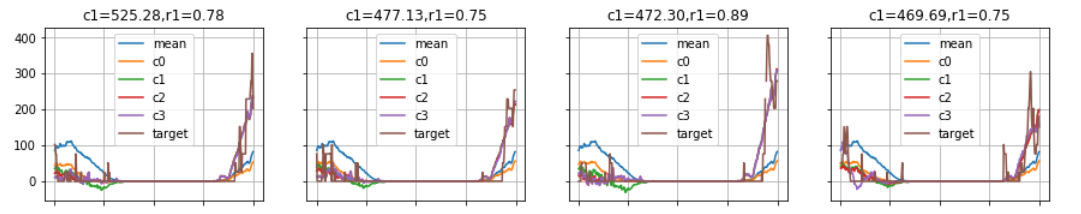
Coeff1: most negative
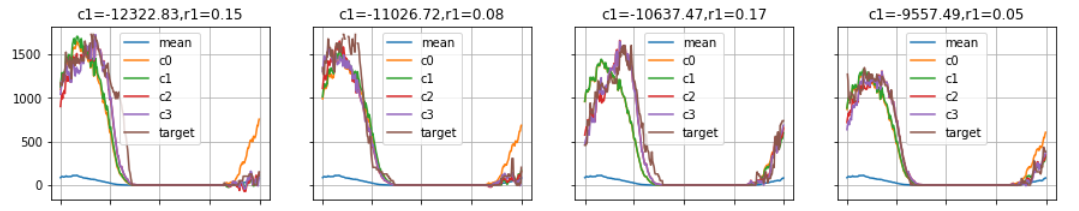
Low (positive) values of coeff1 correspond to less than average snow. 
Large negative values correspond to more than average snow.

#### Coeff2
Coeff2: most positive
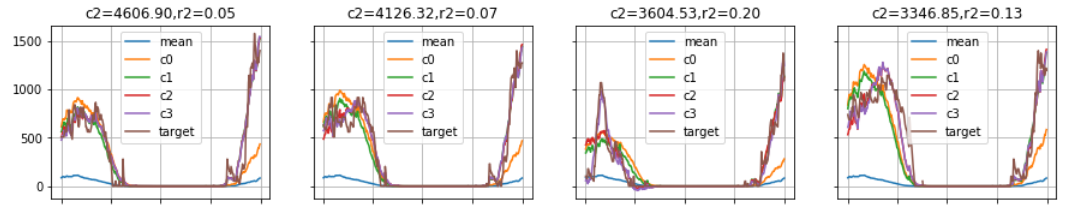
Coeff2: most negative
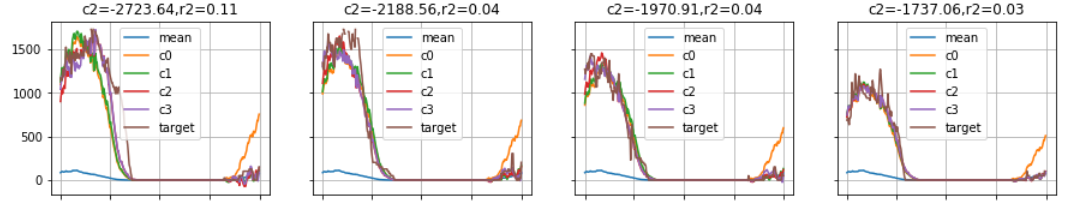
Large positive values of coeff2 correspond to large amount of snow at the end of the year (Nov.-Dec.).
Negative values for coeff2 correspond to few snow at the end of the year.

#### Coeff3
Coeff3: most positive
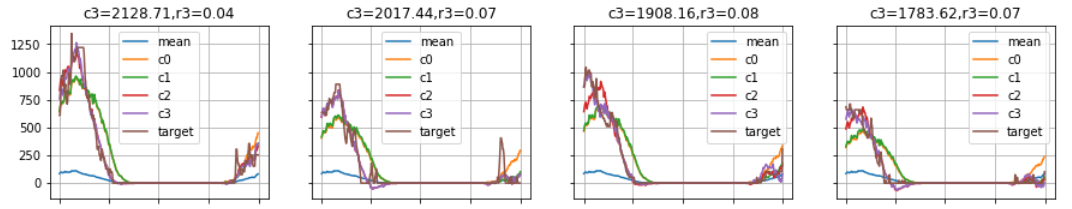
Coeff3: most negative
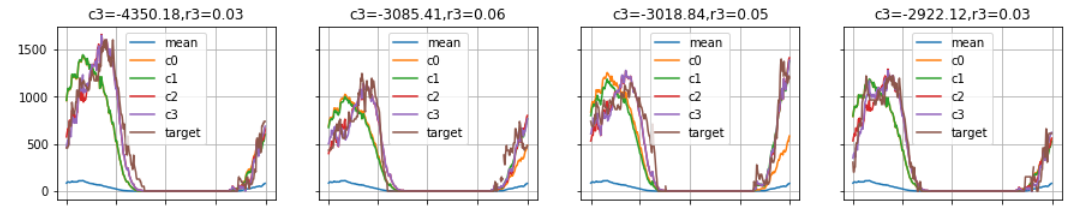
Large positive values of coeff3 correspond to the peak of snow is in Jan.-Feb.
Negative values of coeff3 correspond to the peak of snow is in Mar.-Apr.

### Analysis of TOBS
First, I graph the mean and the top 2 eigen-vectors of TOBS
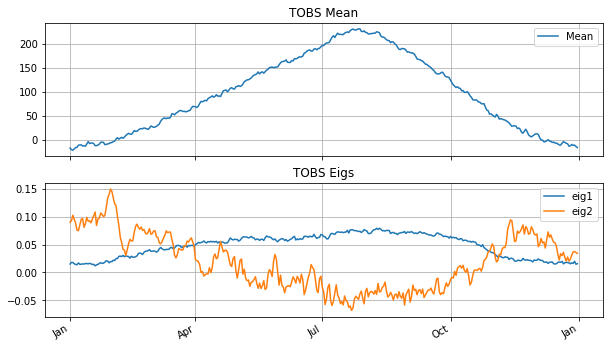

I observe that the temperature curve is like a mountain, where the late July and early August mark the peak of it. We can see that different eigen vectors capture different snow patterns throughout the year. I am interpret them as follows:

**eig1:** The first eigen vector represents the mean of the distribution.

**eig2:** It captures that the summer is cooler and the winter is hotter than the mean, which means that the temperature difference between summer and winter is less than the average.

#### Coeff1
Coeff1: most positive
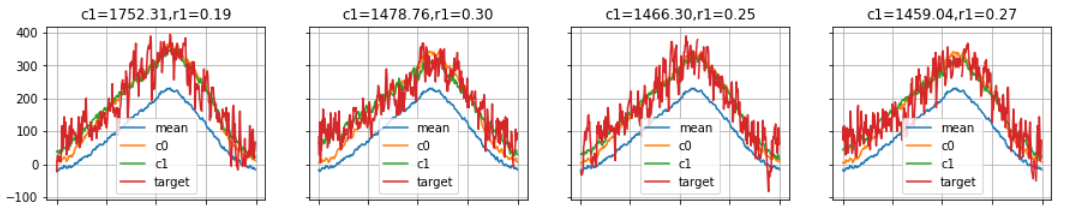
Coeff1: most negative
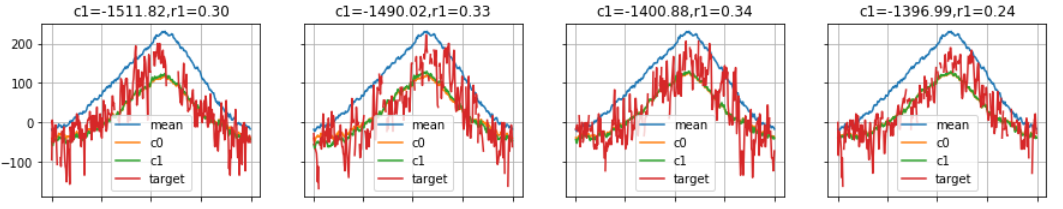
Positive values of coeff1 correspond to temperature higher than the average. 
Negative values correspond to temperature lower than the average.

#### Coeff2
Coeff2: most positive
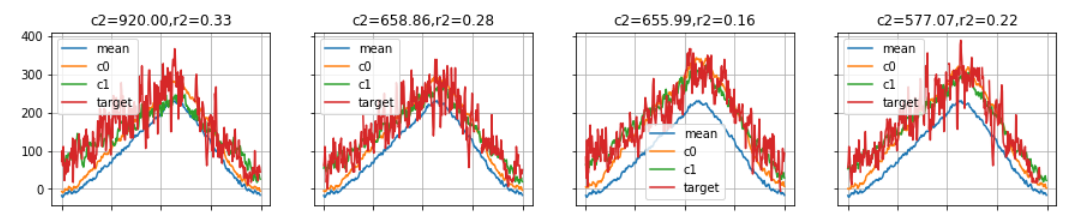
Coeff2: most negative
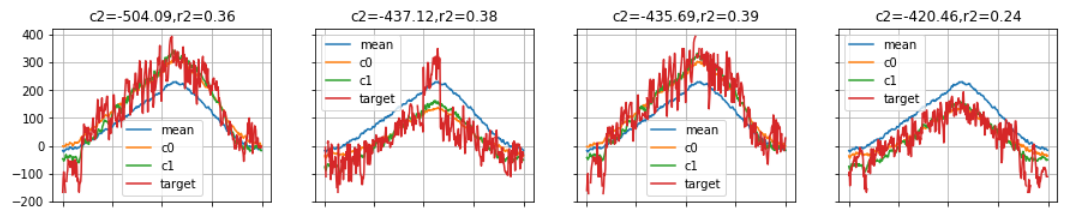
Positive values of coeff2 correspond to less temperature difference between summer and winter.
Negative values for coeff2 correspond to larger temperature difference between summer and winter.

### Geographical distribution of first 4 coefficients.
We want to see that the distribution of the stations as well as the their measurements.
We plot every station on the map with its 4 coefficients of the top 4 eigen vectors for PRCP.
Different colors of triangle indicate different coefficients. Further, the triangle will be transparent if the coefficient is positive, solid otherwise.
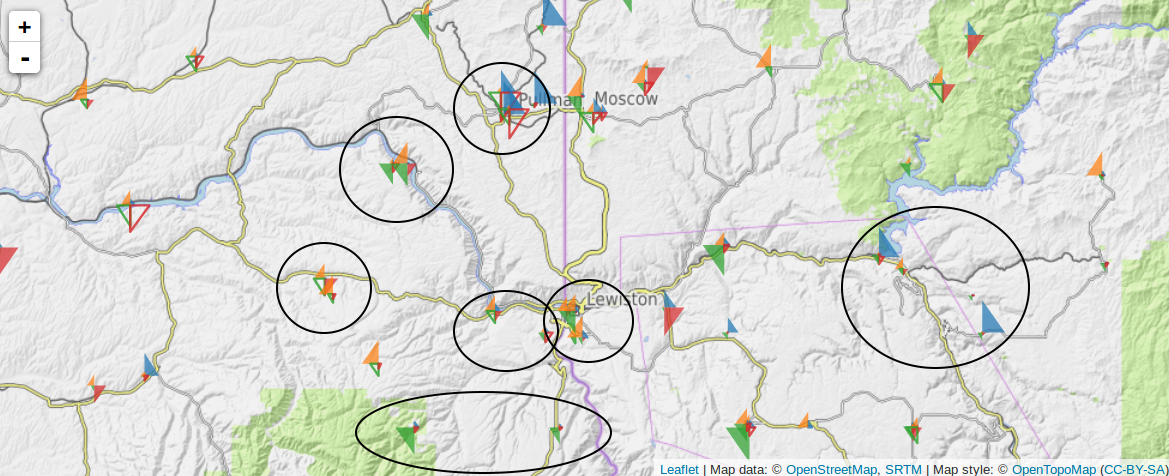
From the graph, we can see that there is some spatial coherence between stations. Stations that are very close with each other will have similar coefficients.

## Estimating the effect of the year vs the effect of the station

To estimate the effect of time vs. location on the first eigenvector coefficient we
compute:

* The average row: `mean-by-station`
* The average column: `mean-by-year`

We then compute the RMS before and after subtracting either the row or the column vector.
If the coefficients across different years are similar (same sign), subtracting mean-by-year will lead to a large drop of RMS. On the other hand, the coefficient across different years have little correlation, mean-by-year will be small and subtracting mean-by-year will lead to a little drop of RMS. The situation for mean-by-station is the same.
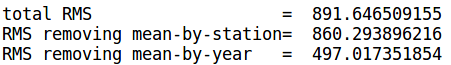
The result shows that coefficients across different years are very similar (little drop) and coefficients across different station are a lot more chaotic. This is reasonable since stations in my region are widely spread. In addition, the climate change across different is very slow and has less impact.

## Measuring statistical significance (PRCP)
We want to find a statistical test for rejecting the null hypothesis that says that the rainfall in the two locations is independent.

Since using the inner product is too noisy, we ignore the amount of rain, and just ask whether it rained in both locations. We can then compute the probability associated with the number of overlaps under the null hypothesis.

### The normalized log probability for each pair of stations
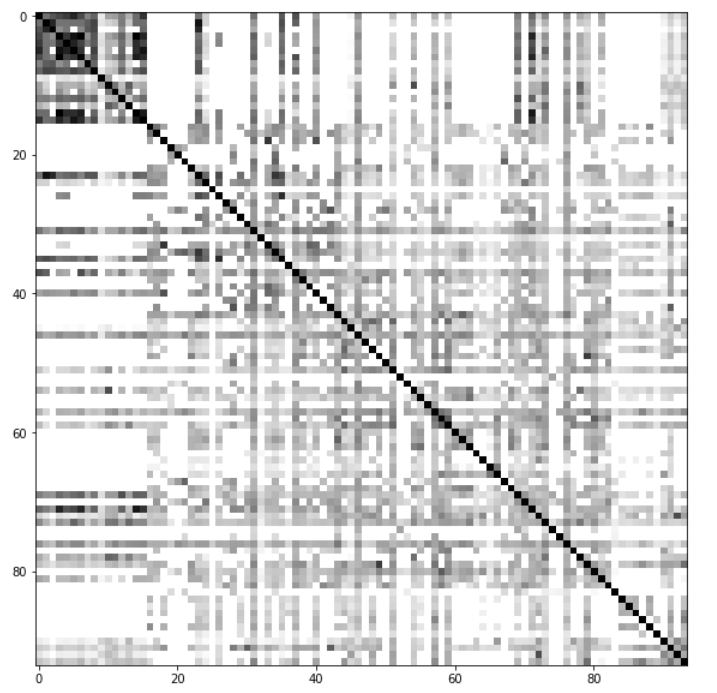

We see immediately the first 15 stations are highly correlatedwith each other. To find more correlations we use SVD (the term PCA is reserved for decomposition of the covariance matrix).

### Using SVD to find more correlations
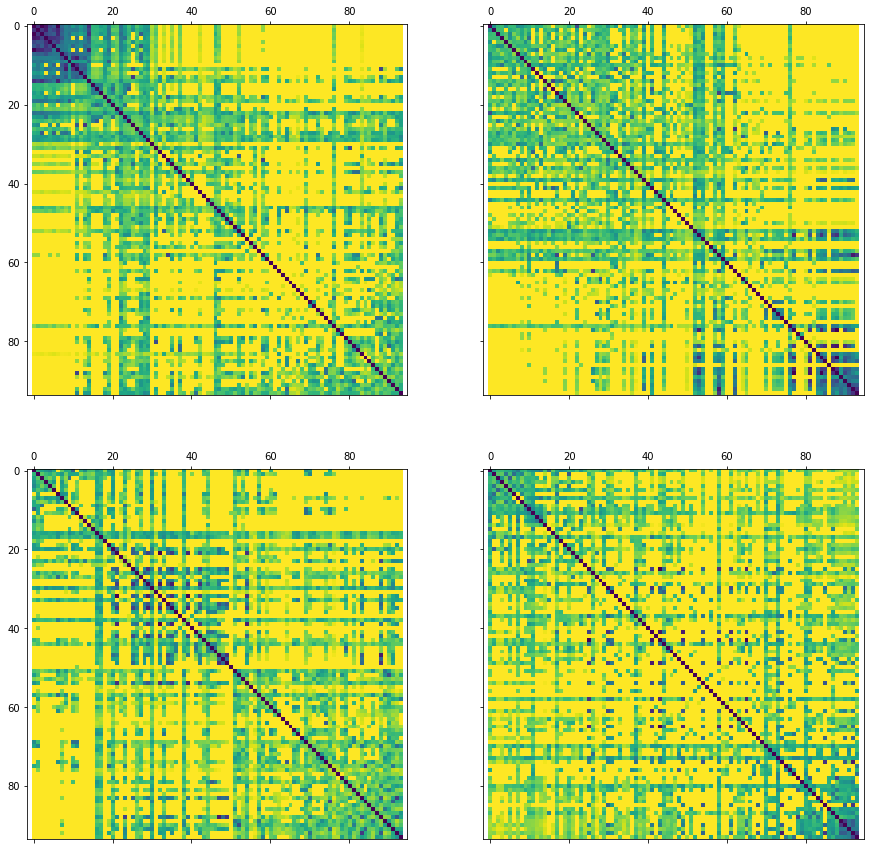
When we reorder the rows and columns of the matrix using one of the eigenvectors, the grouping of the stations becomes more evident. For example, consider the upper left corner of the scond matrix (The upper left one). The stations at positions 0-15 are clearly strongly correlated with each other. In the lower left one, we can also see that the position 20-50 is a cluster.